In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential,Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D,SeparableConv2D,Conv2D
from keras.layers import Activation, Flatten, Dense, Dropout,Input
from keras.layers.merge import Concatenate
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 12s 0us/step


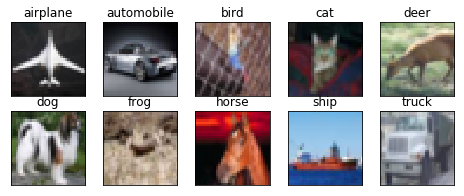

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Spatially Separable Convolution. 

In [0]:
# Define the model
model = Sequential()

model.add(Conv2D(16,(1,3),input_shape=(32,32,3)))
model.add(Conv2D(16, (3,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(32,(1,3)))
model.add(Conv2D(32, (3,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(64,(1,3)))
model.add(Conv2D(64, (3,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(16,(1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(32,(1,3)))
model.add(Conv2D(32,(3,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(64,(1,3)))
model.add(Conv2D(64, (3,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(96,(1,3)))
model.add(Conv2D(96, (3,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(128,(1,3)))
model.add(Conv2D(128, (3,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(16,(1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(10,(1,5)))
model.add(Conv2D(10,(5,1)))
model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Conv2D(10,(1,1)))

model.add(Flatten())
model.add(Activation('softmax'))
          

W0905 09:17:07.089988 140470099101568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 09:17:07.135666 140470099101568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 09:17:07.143837 140470099101568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 09:17:07.202477 140470099101568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0905 09:17:07.203792 1404700991

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 30, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 16)        784       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 28, 32)        1568      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)       

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0903 17:55:01.364475 139980593563520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  del sys.path[0]
W0903 17:55:04.420180 139980593563520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed 

Epoch 1/50
390/390 [==============================] - 37s 95ms/step - loss: 1.8445 - acc: 0.3375 - val_loss: 1.8370 - val_acc: 0.3324
Epoch 2/50
390/390 [==============================] - 30s 76ms/step - loss: 1.3380 - acc: 0.5368 - val_loss: 1.3838 - val_acc: 0.5087
Epoch 3/50
390/390 [==============================] - 30s 76ms/step - loss: 1.1541 - acc: 0.6013 - val_loss: 1.1724 - val_acc: 0.5912
Epoch 4/50
390/390 [==============================] - 30s 76ms/step - loss: 1.0358 - acc: 0.6407 - val_loss: 1.1219 - val_acc: 0.6103
Epoch 5/50
390/390 [==============================] - 29s 76ms/step - loss: 0.9556 - acc: 0.6684 - val_loss: 0.9773 - val_acc: 0.6655
Epoch 6/50
390/390 [==============================] - 30s 76ms/step - loss: 0.8903 - acc: 0.6937 - val_loss: 1.0663 - val_acc: 0.6374
Epoch 7/50
390/390 [==============================] - 30s 76ms/step - loss: 0.8273 - acc: 0.7128 - val_loss: 0.8389 - val_acc: 0.7151
Epoch 8/50
390/390 [==============================] - 30s 76ms

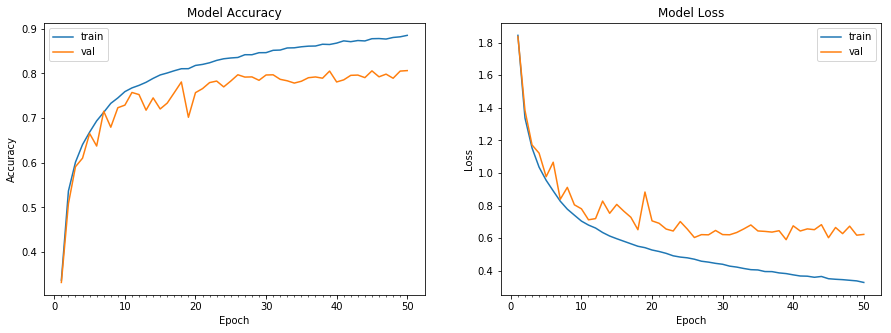

Accuracy on test data is: 80.61


In [0]:

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.evaluate(test_features,test_labels)

10000/10000 [==============================] - 2s 179us/step


[0.6484532123804092, 0.8422]

# Depthwise Separable Convolution. 

In [0]:
model=Sequential()

model.add(SeparableConv2D(32,(3,3),input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(SeparableConv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(SeparableConv2D(128,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(SeparableConv2D(32,(1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(SeparableConv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(SeparableConv2D(96,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(SeparableConv2D(128,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(SeparableConv2D(256,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(SeparableConv2D(32,(1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(SeparableConv2D(10,(5,5),kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_19 (Separab (None, 30, 30, 32)        155       
_________________________________________________________________
batch_normalization_19 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_19 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_20 (Separab (None, 28, 28, 64)        2400      
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
activation_20 (Activation)   (None, 28, 28, 64)       

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0904 07:08:51.065927 140377246226304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, shuffle=False, steps_per_epoch=390, epochs=50)`
  del sys.path[0]
W0904 07:10:50.227853 140377246226304 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and w

Epoch 1/50
390/390 [==============================] - 55s 141ms/step - loss: 1.7789 - acc: 0.3611 - val_loss: 1.6182 - val_acc: 0.4169
Epoch 2/50
390/390 [==============================] - 48s 123ms/step - loss: 1.4078 - acc: 0.5032 - val_loss: 1.3573 - val_acc: 0.5235
Epoch 3/50
390/390 [==============================] - 48s 123ms/step - loss: 1.2330 - acc: 0.5716 - val_loss: 1.1557 - val_acc: 0.6004
Epoch 4/50
390/390 [==============================] - 48s 123ms/step - loss: 1.1135 - acc: 0.6148 - val_loss: 1.3536 - val_acc: 0.5552
Epoch 5/50
390/390 [==============================] - 48s 123ms/step - loss: 1.0210 - acc: 0.6477 - val_loss: 1.1822 - val_acc: 0.6058
Epoch 6/50
390/390 [==============================] - 48s 123ms/step - loss: 0.9493 - acc: 0.6758 - val_loss: 1.0279 - val_acc: 0.6502
Epoch 7/50
390/390 [==============================] - 48s 123ms/step - loss: 0.8899 - acc: 0.6923 - val_loss: 0.9136 - val_acc: 0.6925
Epoch 8/50
390/390 [==============================] - 4

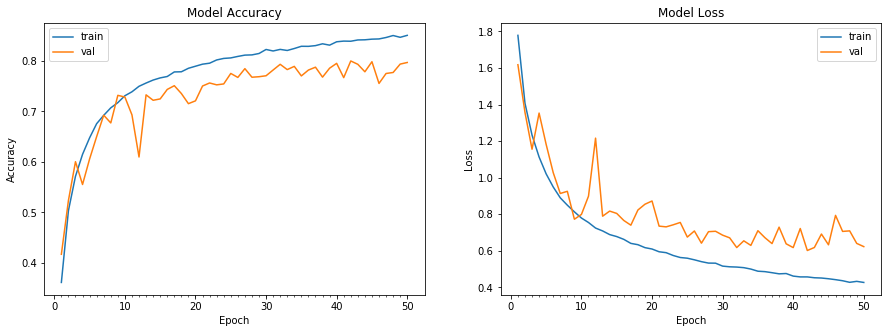

Accuracy on test data is: 79.70


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             rotation_range=15)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, shuffle=False)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Grouped Convolution

In [0]:
input_data=Input(shape=(32,32,3))

layer_1=SeparableConv2D(16,(3,3),use_bias=False,padding='same')(input_data)
layer_1=BatchNormalization()(layer_1)
layer_1=Activation('relu')(layer_1)
layer_1=Dropout(0.05)(layer_1)

layer_2=SeparableConv2D(32,(3,3),use_bias=False,padding='same')(layer_1)
layer_2=BatchNormalization()(layer_2)
layer_2=Activation('relu')(layer_2)
layer_2=Dropout(0.05)(layer_2)

layer3 = MaxPooling2D(pool_size=(2,2))(layer_2) # 6rf 

layer4_1 = SeparableConv2D(64, (3,3), use_bias=False, padding='same')(layer3)
layer4_1 = BatchNormalization()(layer4_1)
layer4_1 = Activation('relu')(layer4_1)
layer4_1=Dropout(0.05)(layer4_1)

layer4_2 = SeparableConv2D(64, (5,5), use_bias=False, padding='same')(layer3)
layer4_2 = BatchNormalization()(layer4_2)
layer4_2 = Activation('relu')(layer4_2)
layer4_2=Dropout(0.05)(layer4_2)

layer5_1 = SeparableConv2D(96, (3,3), use_bias=False, padding='same')(layer4_1)
layer5_1 = BatchNormalization()(layer5_1)
layer5_1 = Activation('relu')(layer5_1)
layer5_1=Dropout(0.05)(layer5_1)

layer5_2 = SeparableConv2D(96, (5,5), use_bias=False, padding='same')(layer4_2)
layer5_2 = BatchNormalization()(layer5_2)
layer5_2 = Activation('relu')(layer5_2)
layer5_2=Dropout(0.05)(layer5_2)

concat_layer = Concatenate()([layer5_1, layer5_2])

layer6 = SeparableConv2D(128, (3,3), use_bias=False, padding='same')(concat_layer)
layer6 = BatchNormalization()(layer6)
layer6 = Activation('relu')(layer6)
layer6=Dropout(0.05)(layer6)

layer7 = SeparableConv2D(256, (3,3), use_bias=False, padding='same')(layer6)
layer7 = BatchNormalization()(layer7)
layer7 = Activation('relu')(layer7)
layer7=Dropout(0.05)(layer7)

layer8 = MaxPooling2D(pool_size=(2,2))(layer7)

layer9 = SeparableConv2D(128, (8,8), use_bias=False)(layer8)


layer10 = Conv2D(10, (1,1), use_bias=False, padding='same')(layer9)

layer11 = Flatten()(layer10)

output = Activation('softmax')(layer11)


In [0]:
model = Model(input=[input_data], output=[output])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  """Entry point for launching an IPython kernel.


In [0]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_44 (SeparableC (None, 32, 32, 16)   75          input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_40 (BatchNo (None, 32, 32, 16)   64          separable_conv2d_44[0][0]        
__________________________________________________________________________________________________
activation_43 (Activation)      (None, 32, 32, 16)   0           batch_normalization_40[0][0]     
____________________________________________________________________________________________

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, shuffle=False, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 37s 95ms/step - loss: 1.2871 - acc: 0.5361 - val_loss: 1.1899 - val_acc: 0.5858
Epoch 2/50
390/390 [==============================] - 33s 85ms/step - loss: 0.9188 - acc: 0.6781 - val_loss: 0.9268 - val_acc: 0.6724
Epoch 3/50
390/390 [==============================] - 33s 84ms/step - loss: 0.7883 - acc: 0.7248 - val_loss: 0.9399 - val_acc: 0.6839
Epoch 4/50
390/390 [==============================] - 33s 84ms/step - loss: 0.7133 - acc: 0.7506 - val_loss: 0.8075 - val_acc: 0.7183
Epoch 5/50
390/390 [==============================] - 33s 86ms/step - loss: 0.6471 - acc: 0.7738 - val_loss: 0.8174 - val_acc: 0.7219
Epoch 6/50
390/390 [==============================] - 33s 85ms/step - loss: 0.6007 - acc: 0.7883 - val_loss: 0.8679 - val_acc: 0.7149
Epoch 7/50
390/390 [==============================] - 33s 86ms/step - loss: 0.5556 - acc: 0.8065 - val_loss: 0.7209 - val_acc: 0.7549
Epoch 8/50
390/390 [==============================] - 33s 85ms

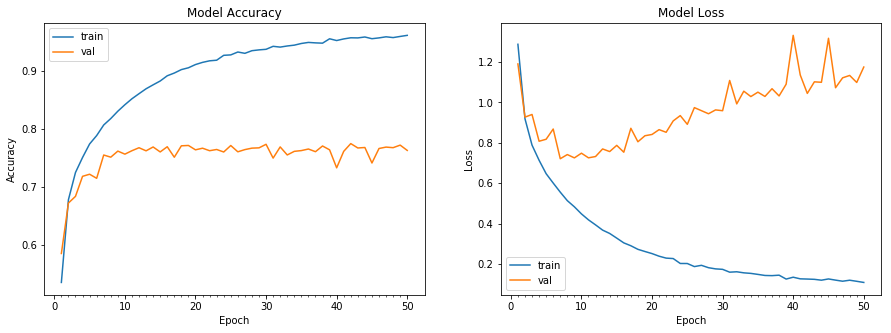

Accuracy on test data is: 76.28


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, shuffle=False)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Dialated Convolution 

In [0]:
input_data = Input(shape=(32,32,3))

layer1 = SeparableConv2D(16, (3,3), use_bias=False, padding='same',dilation_rate=(2,2))(input_data) # 3rf
layer1 = BatchNormalization()(layer1)
layer1 = Activation('relu')(layer1)
layer1=Dropout(0.1)(layer1)

layer2 = SeparableConv2D(32, (3,3), use_bias=False, padding='same',dilation_rate=(2,2))(layer1) # 5rf
layer2 = BatchNormalization()(layer2)
layer2 = Activation('relu')(layer2)
layer2 = Dropout(0.1)(layer2)

layer3 = MaxPooling2D(pool_size=(2,2))(layer2) # 6rf 
layer3 = Dropout(0.1)(layer3)

layer4_1 = SeparableConv2D(48, (3,3), use_bias=False, padding='same')(layer3)
layer4_1 = BatchNormalization()(layer4_1)
layer4_1 = Activation('relu')(layer4_1)
layer4_1=Dropout(0.1)(layer4_1)

layer4_2 = SeparableConv2D(48, (5,5), use_bias=False, padding='same')(layer3)
layer4_2 = BatchNormalization()(layer4_2)
layer4_2 = Activation('relu')(layer4_2)
layer4_2=Dropout(0.1)(layer4_2)

layer5_1 = SeparableConv2D(64, (3,3), use_bias=False, padding='same')(layer4_1)
layer5_1 = BatchNormalization()(layer5_1)
layer5_1 = Activation('relu')(layer5_1)
layer5_1=Dropout(0.1)(layer5_1)

layer5_2 = SeparableConv2D(64, (5,5), use_bias=False, padding='same')(layer4_2)
layer5_2 = BatchNormalization()(layer5_2)
layer5_2 = Activation('relu')(layer5_2)
layer5_2=Dropout(0.1)(layer5_2)

concat_layer = Concatenate()([layer5_1, layer5_2])
# concat_layer = MaxPooling2D(pool_size=(2,2))(concat_layer)

layer6 = SeparableConv2D(96, (3,3), use_bias=False, padding='same')(concat_layer)
layer6 = BatchNormalization()(layer6)
layer6 = Activation('relu')(layer6)
layer6 = Dropout(0.1)(layer6)

layer7 = SeparableConv2D(128, (3,3), use_bias=False, padding='same')(layer6)
layer7 = BatchNormalization()(layer7)
layer7 = Activation('relu')(layer7)
layer7 = Dropout(0.1)(layer7)

pool_layer = MaxPooling2D(pool_size=(2,2))(layer7)

layer8 = SeparableConv2D(256, (3,3), use_bias=False, padding='same')(pool_layer)
layer8 = BatchNormalization()(layer8)
layer8 = Activation('relu')(layer8)
layer8 = Dropout(0.1)(layer8)

# layer8 = MaxPooling2D(pool_size=(2,2))(layer7)

layer9 = SeparableConv2D(32, (1,1), use_bias=False, padding='same')(layer8)
layer9 = Dropout(0.1)(layer9)

layer10 = SeparableConv2D(10, (8,8), use_bias=False)(layer9)

# layer10 = Conv2D(10, (1,1), use_bias=False, padding='same')(layer9)

layer11 = Flatten()(layer10)

output = Activation('softmax')(layer11)

In [0]:
model = Model(input=[input_data], output=[output])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  """Entry point for launching an IPython kernel.


In [0]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_48 (SeparableC (None, 32, 32, 16)   75          input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_53 (BatchNo (None, 32, 32, 16)   64          separable_conv2d_48[0][0]        
__________________________________________________________________________________________________
activation_57 (Activation)      (None, 32, 32, 16)   0           batch_normalization_53[0][0]     
____________________________________________________________________________________________

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, shuffle=False, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 44s 114ms/step - loss: 1.5646 - acc: 0.4284 - val_loss: 1.4040 - val_acc: 0.4919
Epoch 2/50
390/390 [==============================] - 40s 103ms/step - loss: 1.1756 - acc: 0.5808 - val_loss: 1.3793 - val_acc: 0.5283
Epoch 3/50
390/390 [==============================] - 40s 102ms/step - loss: 1.0399 - acc: 0.6327 - val_loss: 1.0235 - val_acc: 0.6340
Epoch 4/50
390/390 [==============================] - 40s 103ms/step - loss: 0.9617 - acc: 0.6621 - val_loss: 1.0296 - val_acc: 0.6348
Epoch 5/50
390/390 [==============================] - 41s 104ms/step - loss: 0.8952 - acc: 0.6861 - val_loss: 0.9487 - val_acc: 0.6621
Epoch 6/50
390/390 [==============================] - 41s 104ms/step - loss: 0.8439 - acc: 0.7047 - val_loss: 1.2130 - val_acc: 0.5827
Epoch 7/50
390/390 [==============================] - 41s 104ms/step - loss: 0.8014 - acc: 0.7179 - val_loss: 0.9492 - val_acc: 0.6667
Epoch 8/50
390/390 [==============================] - 4

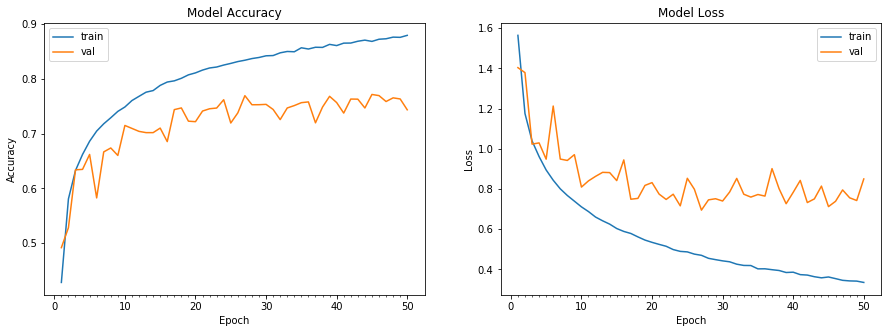

Accuracy on test data is: 74.36


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, shuffle=False)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Reduced number of parameters.

In [0]:
# Define the model
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3), ))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, 3, 3,))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3,border_mode='same' ))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(256, 3, 3, ))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Convolution2D(512, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# model.add(Convolution2D(128, 3, 3, ))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

model.add(Convolution2D(32, 1, 1, activation='relu',kernel_regularizer=l2(0.01)))

model.add(Convolution2D(10,(6, 6)))

model.add(Flatten())

model.add(Activation('softmax'))
# model.add(Dense(num_classes, activation='softmax'))
# Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` ca

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
activation_16 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 64)       

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 35s 91ms/step - loss: 1.5154 - acc: 0.5467 - val_loss: 1.2108 - val_acc: 0.6070
Epoch 2/50
390/390 [==============================] - 32s 83ms/step - loss: 0.9294 - acc: 0.6956 - val_loss: 1.3098 - val_acc: 0.6167
Epoch 3/50
390/390 [==============================] - 32s 83ms/step - loss: 0.7601 - acc: 0.7511 - val_loss: 0.8568 - val_acc: 0.7164
Epoch 4/50
390/390 [==============================] - 32s 83ms/step - loss: 0.6725 - acc: 0.7802 - val_loss: 0.8927 - val_acc: 0.7086
Epoch 5/50
390/390 [==============================] - 32s 83ms/step - loss: 0.6014 - acc: 0.8052 - val_loss: 0.7502 - val_acc: 0.7633
Epoch 6/50
390/390 [==============================] - 32s 83ms/step - loss: 0.5519 - acc: 0.8230 - val_loss: 1.0623 - val_acc: 0.6790
Epoch 7/50
390/390 [==============================] - 33s 83ms/step - loss: 0.5053 - acc: 0.8389 - val_loss: 0.6945 - val_acc: 0.7799
Epoch 8/50
390/390 [==============================] - 32s 83ms

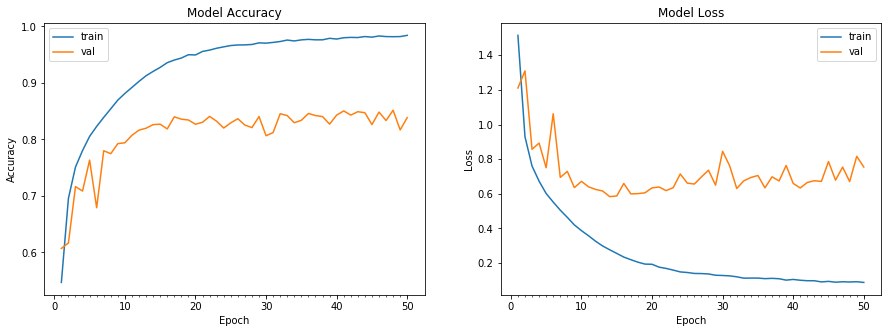

Accuracy on test data is: 83.86


In [0]:
# datagen = ImageDataGenerator(zoom_range=0.0, 
#                              horizontal_flip=True, 
# #                              vertical_flip=True,
#                              rotation_range=45,
# #                              featurewise_center=True)


datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
prediction= model.predict_classes(test_features)

In [0]:
misclassified = []
for i in range(len(test_labels)):
    if test_labels[i] != prediction[i]:
        misclassified.append((test_labels[i], prediction[i], i))

ValueError: ignored